<a href="https://colab.research.google.com/github/nhatanh81096/cs480student/blob/main/07/Anh_Vo_CS480_Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

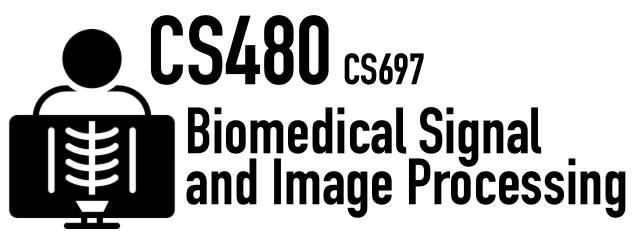
#Assignment 7

In [ ]:
# In this assignment, we will explore the Imaging Data Commons,
# a new service from the National Cancer Institute.
#
# We will find and explore a PET dataset and then perform a MIP reconstruction.

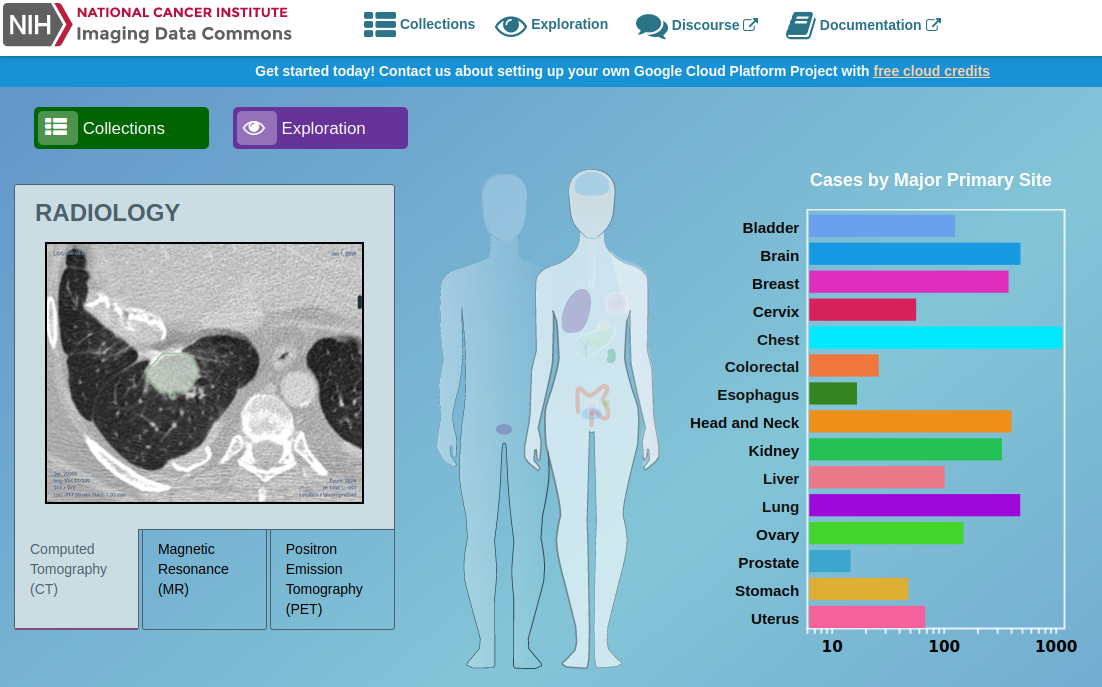

**Task 1**: Browse the IDC datasets and find a combined CT or MRI with PET! [15 Points]

In [ ]:
#
# Visit https://portal.imaging.datacommons.cancer.gov/ and find a dataset
# that includes structural imaging such as CT or MRI combined with a PET scan.
#
# You can start by selecting the type of a cancer case such as Bladder, Brain etc.
# Hint: Head and Neck include many PET scans.
#

In [ ]:
# TODO: Open the integrated OHIF viewer to view the data.
#
# 1) Select a collection, then a case, then a study in the IDC interface.
# 2) To open the OHIF viewer, click on the view icon.
# 3) Paste a screenshot of the viewer after the data was loaded below.
#

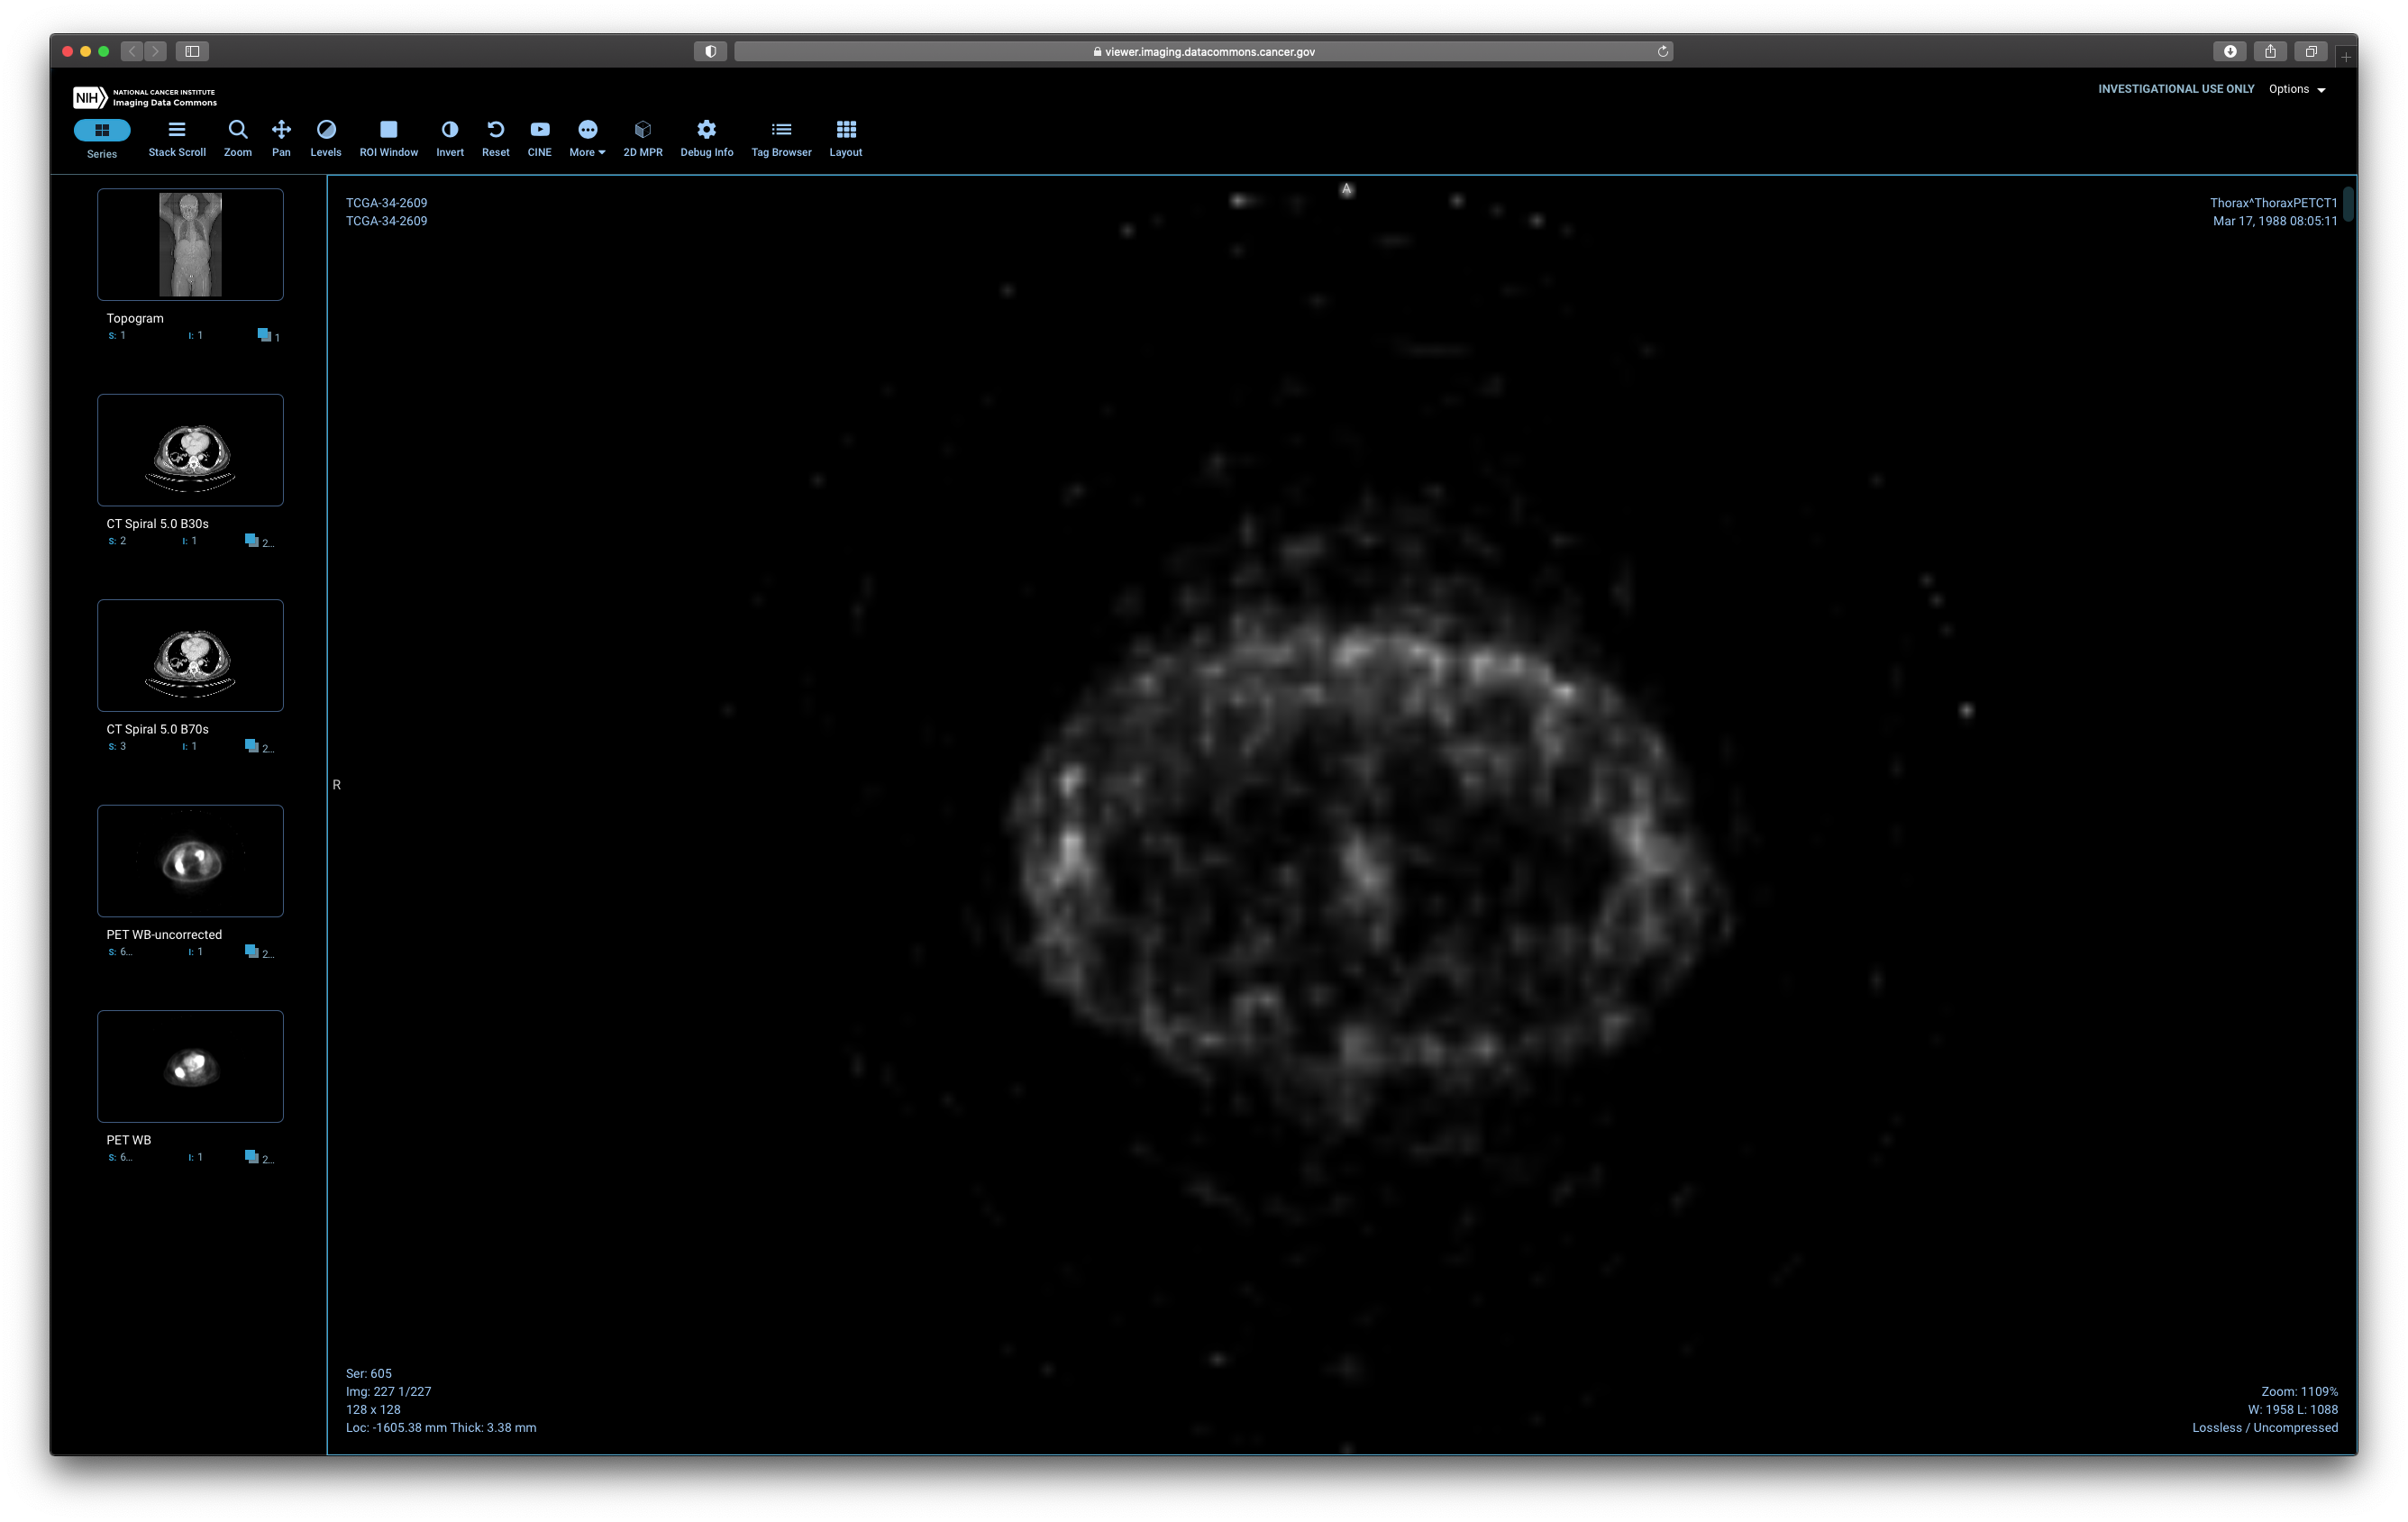

**Task 2**: Visualize structural and PET side-by-side! [30 Points]

In [ ]:
# In the OHIF viewer, please change the layout to show the structural image
# next to the PET scan.
#
# TODO: Use the LAYOUT functionality in the toolbar to switch to a 2-column layout.

In [ ]:
# TODO: Find the cancerous lesion.
#
# 1) Navigate through the PET image to find the cancerous lesion.

In [ ]:
# TODO: Sync the structural scan (CT or MR) to the PET scan with the lesion.
#
# Hint: The "Loc" label in the bottom left of both scans should roughly match.
# Hint 2: The Levels tool allows Window/Level adjustment to increase contrast.
#

In [ ]:
# TODO: Paste a screenshot showing the 2-column layout below.

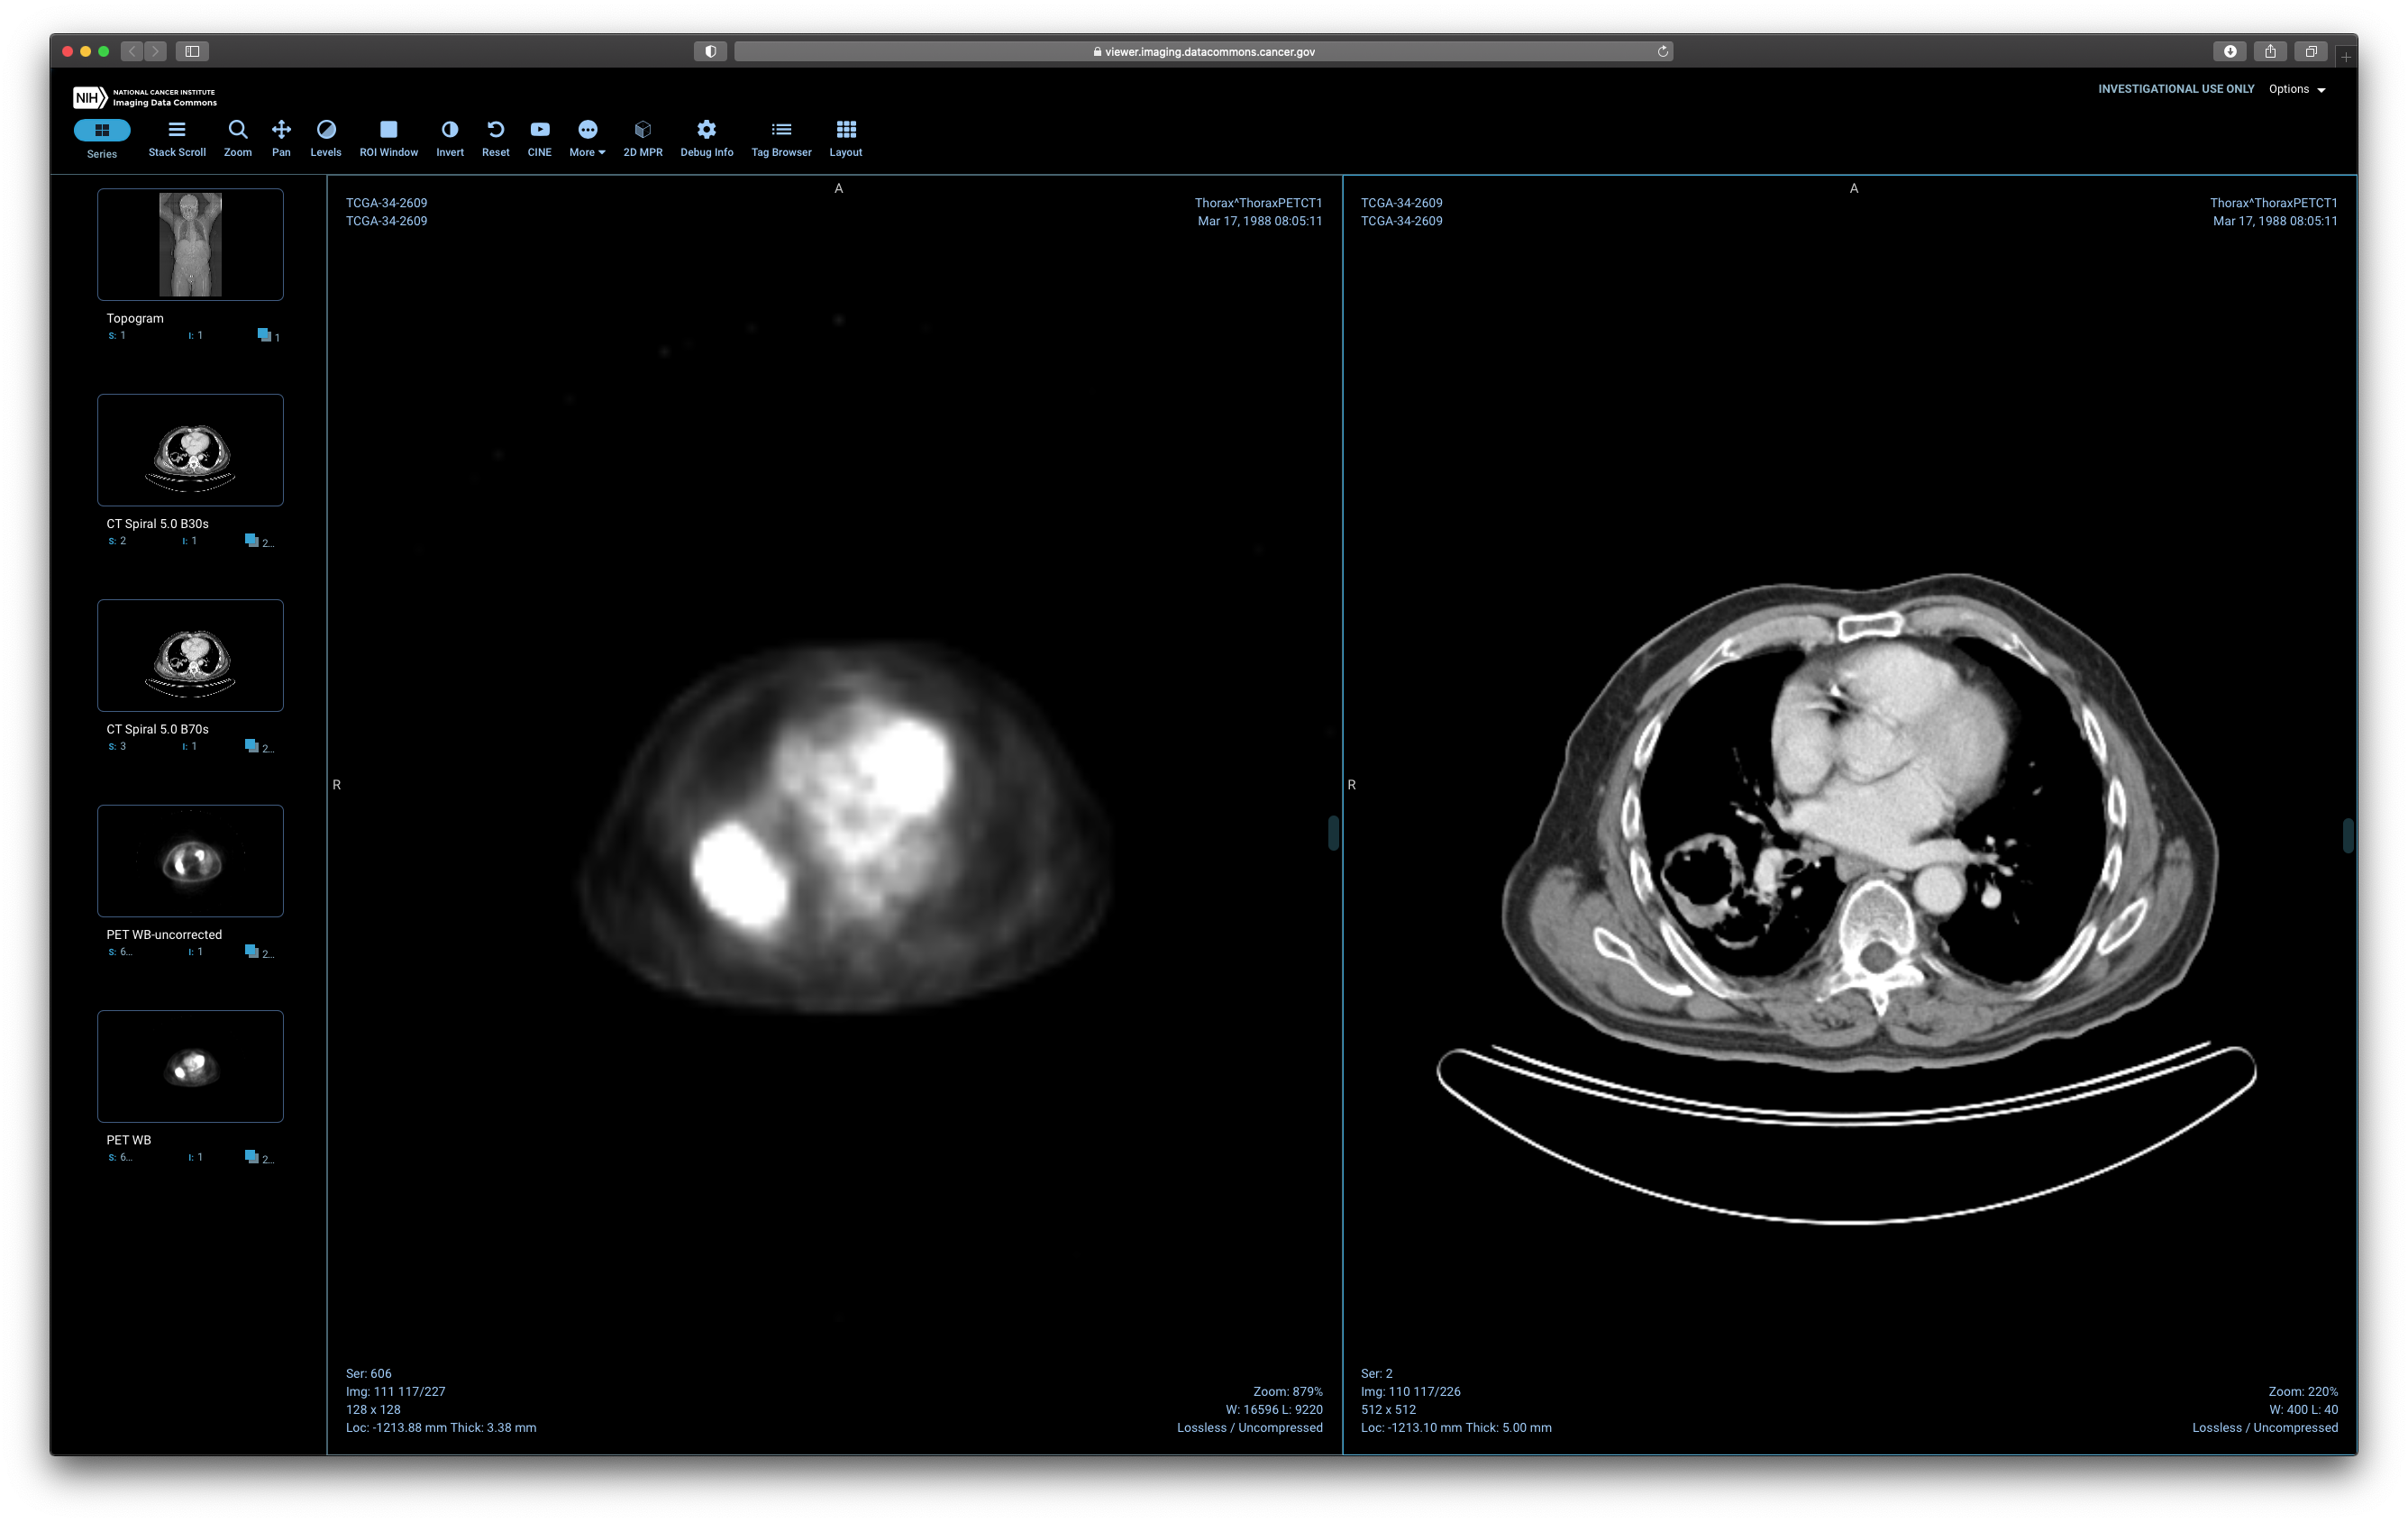

**Task 3**: Use an MIP to reslice the PET scan! [35 Points]

In [ ]:
# We will now use the 2D MPR functionality to look at the lesion from different
# orientations.
#
# Hint: This works best in Google Chrome.

In [ ]:
# Question 1): What is MPR?
#

Multiplanar reformation or reconstruction (MPR) involves the process of converting data from an imaging modality acquired in a certain plane, usually axial, into another plane 1. It is most commonly performed with thin-slice data from volumetric CT in the axial plane, but it may be accomplished with scanning in any plane and whichever modality capable of cross-sectional imaging, including magnetic resonance imaging (MRI), PET and SPECT.

The acquired data, for example from the axial plane, can then be converted to non-axial planes such as coronal, sagittal or oblique.

Reference: [Introduction to the Language of Three-dimensional Imaging with Multidetector CT](https://pubs.rsna.org/doi/full/10.1148/rg.255055044)

In [ ]:
# Question 2): What is the difference between MIP, MinIP, AvgIP?
#

**Average Intensity Projection**

AvgIP describes one type of algorithm used to thicken MPRs. The image represents **the average of each component attenuation value** encountered by a ray cast through an object toward the viewer’s eyes. Starting with an MPR with a thickness of only 1 pixel (0.5–0.8 mm), thickening the multiplanar slab by using AvgIP may be used to produce images that have an appearance similar to traditional axial images with regard to low contrast resolution. This can be useful for characterizing the internal structures of a solid organ or the walls of hollow structures such as blood vessels or the intestine.

**Maximum Intensity Projection**

MIP images are achieved by displaying only **the highest attenuation value** from the data encountered by a ray cast through an object to the viewer’s eyes. MIP is best used when the objects of interest are the brightest objects in the image and is commonly used to evaluate contrast material–filled structures for CT angiography and CT urography. Large-volume MIP images have long been used to obtain 3D images from MR angiography data. Because only data with the highest value are used, MIP images usually contain 10% or less of the original data, a factor that was critical when computer processing power limited accessibility to advanced imaging techniques.

**Minimum Intensity Projection**

MinIP images are multiplanar slab images produced by displaying only **the lowest attenuation value** encountered along a ray cast through an object toward the viewer’s eyes. MinIP is not used commonly but may be used to generate images of the central airways or areas of air trapping within the lung. These images may provide valuable perspective in defining lesions for surgical planning or detecting subtle small airway disease.

Reference: [Introduction to the Language of Three-dimensional Imaging with Multidetector CT](https://pubs.rsna.org/doi/full/10.1148/rg.255055044)



In [ ]:
# Now, please navigate to the lesion in all 3 orientations.
#
# TODO: Paste a screenshot below.
#

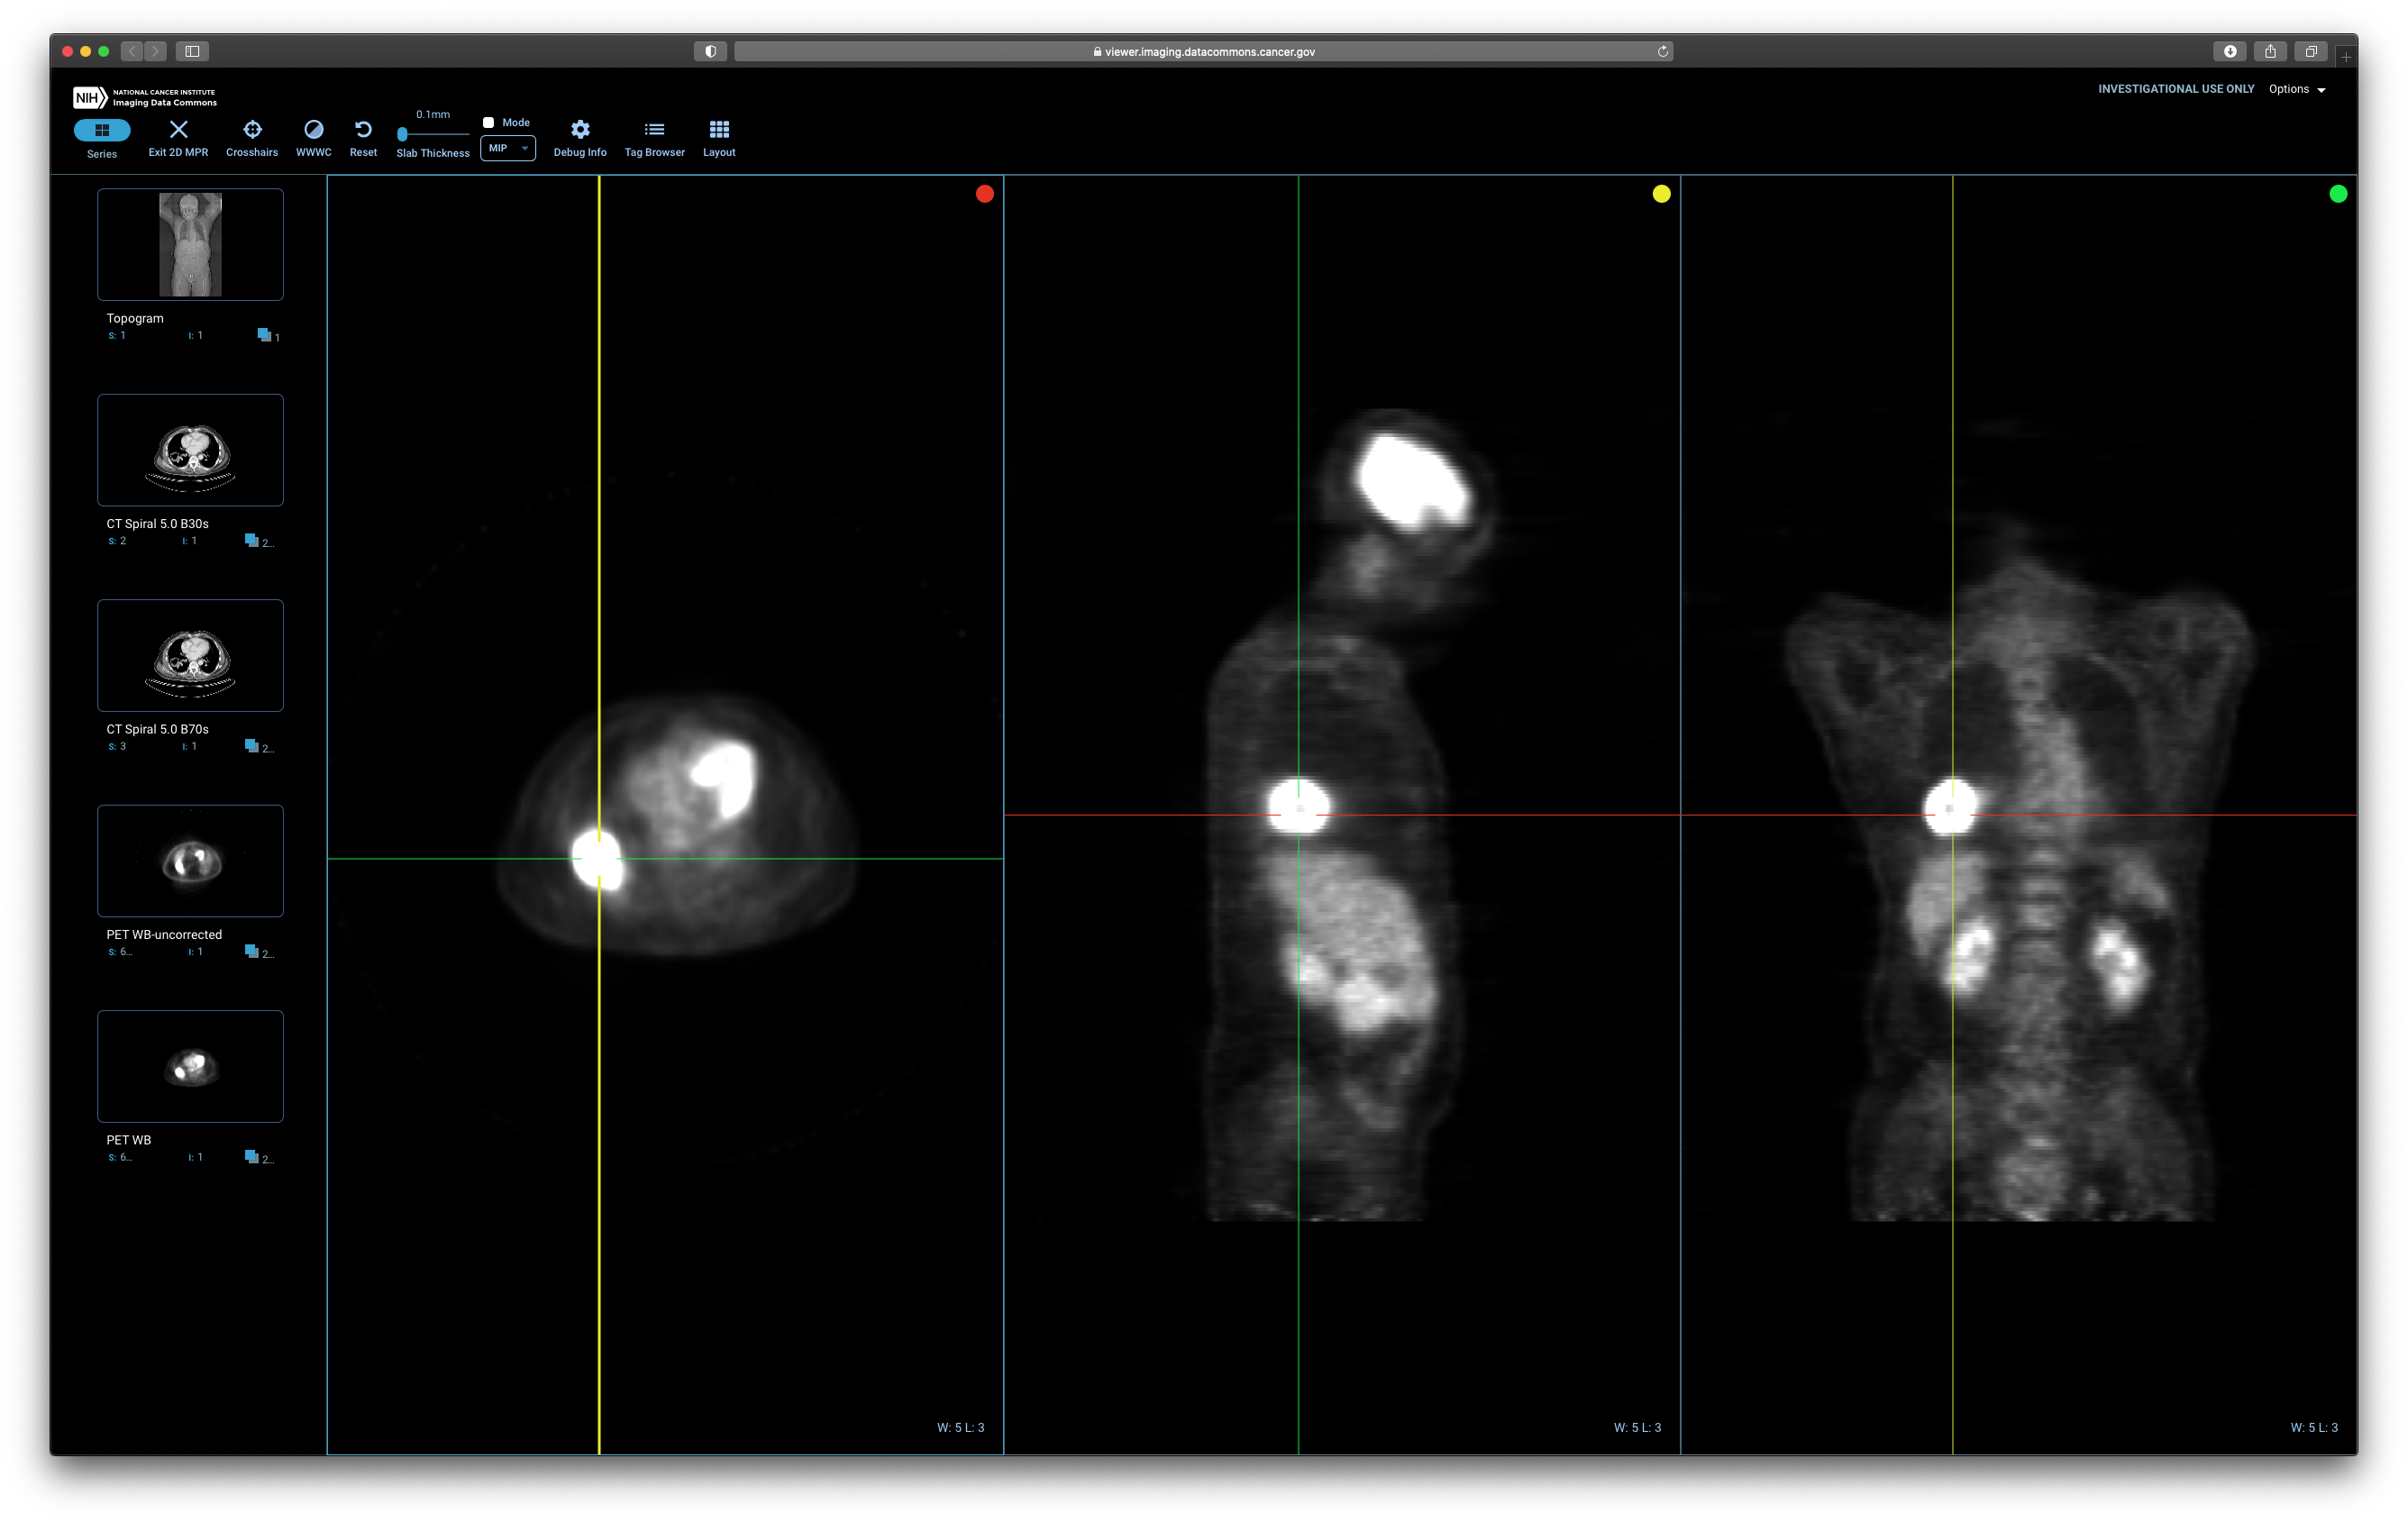

In [ ]:
# Question 3): What does the Slab Thickness slider do?
#

It changes the thickness of the slab that create the MPR.

**Task 4**: Let's access the pixel data! [20 Points]

In [ ]:
# Please EXIT THE 2D MPR.
#
# We will now grab the pixel data of the currently displayed slice
# using the Javascript console.
#

In [ ]:
# 1) Open the Developer Tools of your browser and access the JS console.
#

In [ ]:
# 2) The following code allows to access the pixel data of the slice that
# is currently displayed.
#
# element = cornerstone.getEnabledElements()[0];
# pixels = element.image.getPixelData();
#

In [ ]:
# Question 4): What is the maximum pixel value of the current slice?
#
# Hint: There are multiple ways of doing this according to
# https://medium.com/coding-at-dawn/the-fastest-way-to-find-minimum-and-maximum-values-in-an-array-in-javascript-2511115f8621
#

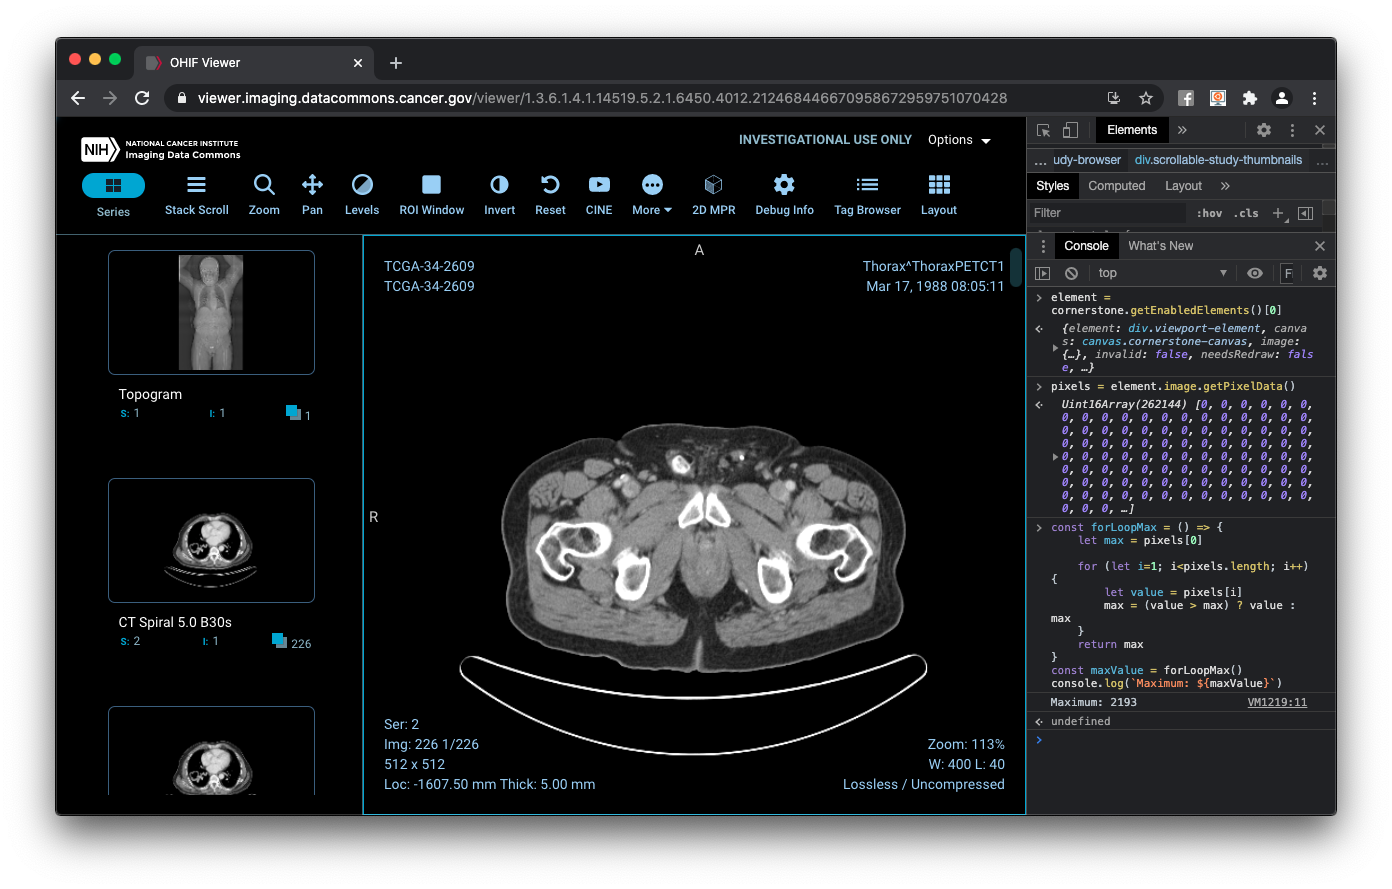

**Maximum pixel value is 2193**

**Bonus**: Apply a filter mask to the current slice! [33 Points]


In [ ]:
# Here we will modify the pixel data!
#
# The following code allows you to set the pixels of the current slice.
#
#   pixels.set(new_pixels);
#
# Write code to APPLY A FILTER MASK to the pixels.
#
# Hint: You can use the following code to get the dimensions of the current slice.
#   w = element.image.width;
#   h = element.image.height;
#
# You can decide which filter mask to apply (e.g., Gaussian blur, edge detection..).
#
# ** IMPORTANT **
# Hint 2: Triggering a REDRAW programmatically might be hard but you can use
# the LEVELS tool to manually trigger a redraw to see filtered pixels.
# ** IMPORTANT **



```
function convert2d(array, width, height) {
	// Convert the 1d array to 2d array

	const newArr = [];
	for (let i = 0; i < height; ++i) 
		newArr.push(array.slice(i*width, i*width + width))
	return newArr;
}

// -----------------------------------------------------------------------------------------------------------
// Convolution process is based on this implementation: https://stackoverflow.com/a/64670117

function uniform_array(len, value) {
    let arr = new Array(len); for (let i=0; i<len; ++i) arr[i] = Array.isArray(value) ? [...value] : value;
    return arr;
}

function conv_2d(kernel, array){
    var result = uniform_array(array.length, uniform_array(array[0].length, 0));
    var kRows = kernel.length;
    var kCols = kernel[0].length;
    var rows = array.length;
    var cols = array[0].length;
    // find center position of kernel (half of kernel size)
    var kCenterX = Math.floor(kCols/2);
    var kCenterY = Math.floor(kRows/2);
    var i, j, m, n, ii, jj;

    for(i=0; i < rows; ++i){          // for all rows
        for(j=0; j < cols; ++j){          // for all columns
            for(m=0; m < kRows; ++m){         // for all kernel rows
                for(n=0; n < kCols; ++n){        // for all kernel columns
                    // index of input signal, used for checking boundary
                    ii = i + (m - kCenterY);
                    jj = j + (n - kCenterX);
                    // ignore input samples which are out of bound
                    if(ii >= 0 && ii < rows && jj >= 0 && jj < cols){
                        result[i][j] += array[ii][jj] * kernel[m][n];
                    };
                };
            };
        };
    };
    return result;
};
// -----------------------------------------------------------------------------------------------------------


function sobelFilter(image) {
	// Apply the Sobel Filter to the image

	const si = [
		[1,2,1],
		[0,0,0],
		[-1,-2,-1]
	];

	const sj = [
		[1,0,-1],
		[2,0,-2],
		[1,0,-1]
	];

	const new_i = conv_2d(si, image);
	const new_j = conv_2d(sj, image);

	var result = uniform_array(image.length, uniform_array(image[0].length, 0));
	var rows = image.length;
	var cols = image[0].length;
	for (let i = 0; i < rows; i++) {
		for (let j = 0; j < cols; j++) {
			result[i][j] = Math.sqrt(Math.pow(new_i[i][j], 2) + Math.pow(new_j[i][j], 2))
		}
	}
	return result;
}

function applyFilter(element) {
	// Run everything
	
	w = element.image.width
	h = element.image.height

	pixels = element.image.getPixelData()

	image = convert2d(pixels, w, h)

	filtered = sobelFilter(image)
	new_pixels = [].concat(...filtered)
	pixels.set(new_pixels)
	cornerstone.renderGrayscaleImage(element, true)
}

element = cornerstone.getEnabledElements()[0]
applyFilter(element)
```



In [ ]:
# TODO: Please add a screenshot after filtering the current slice.

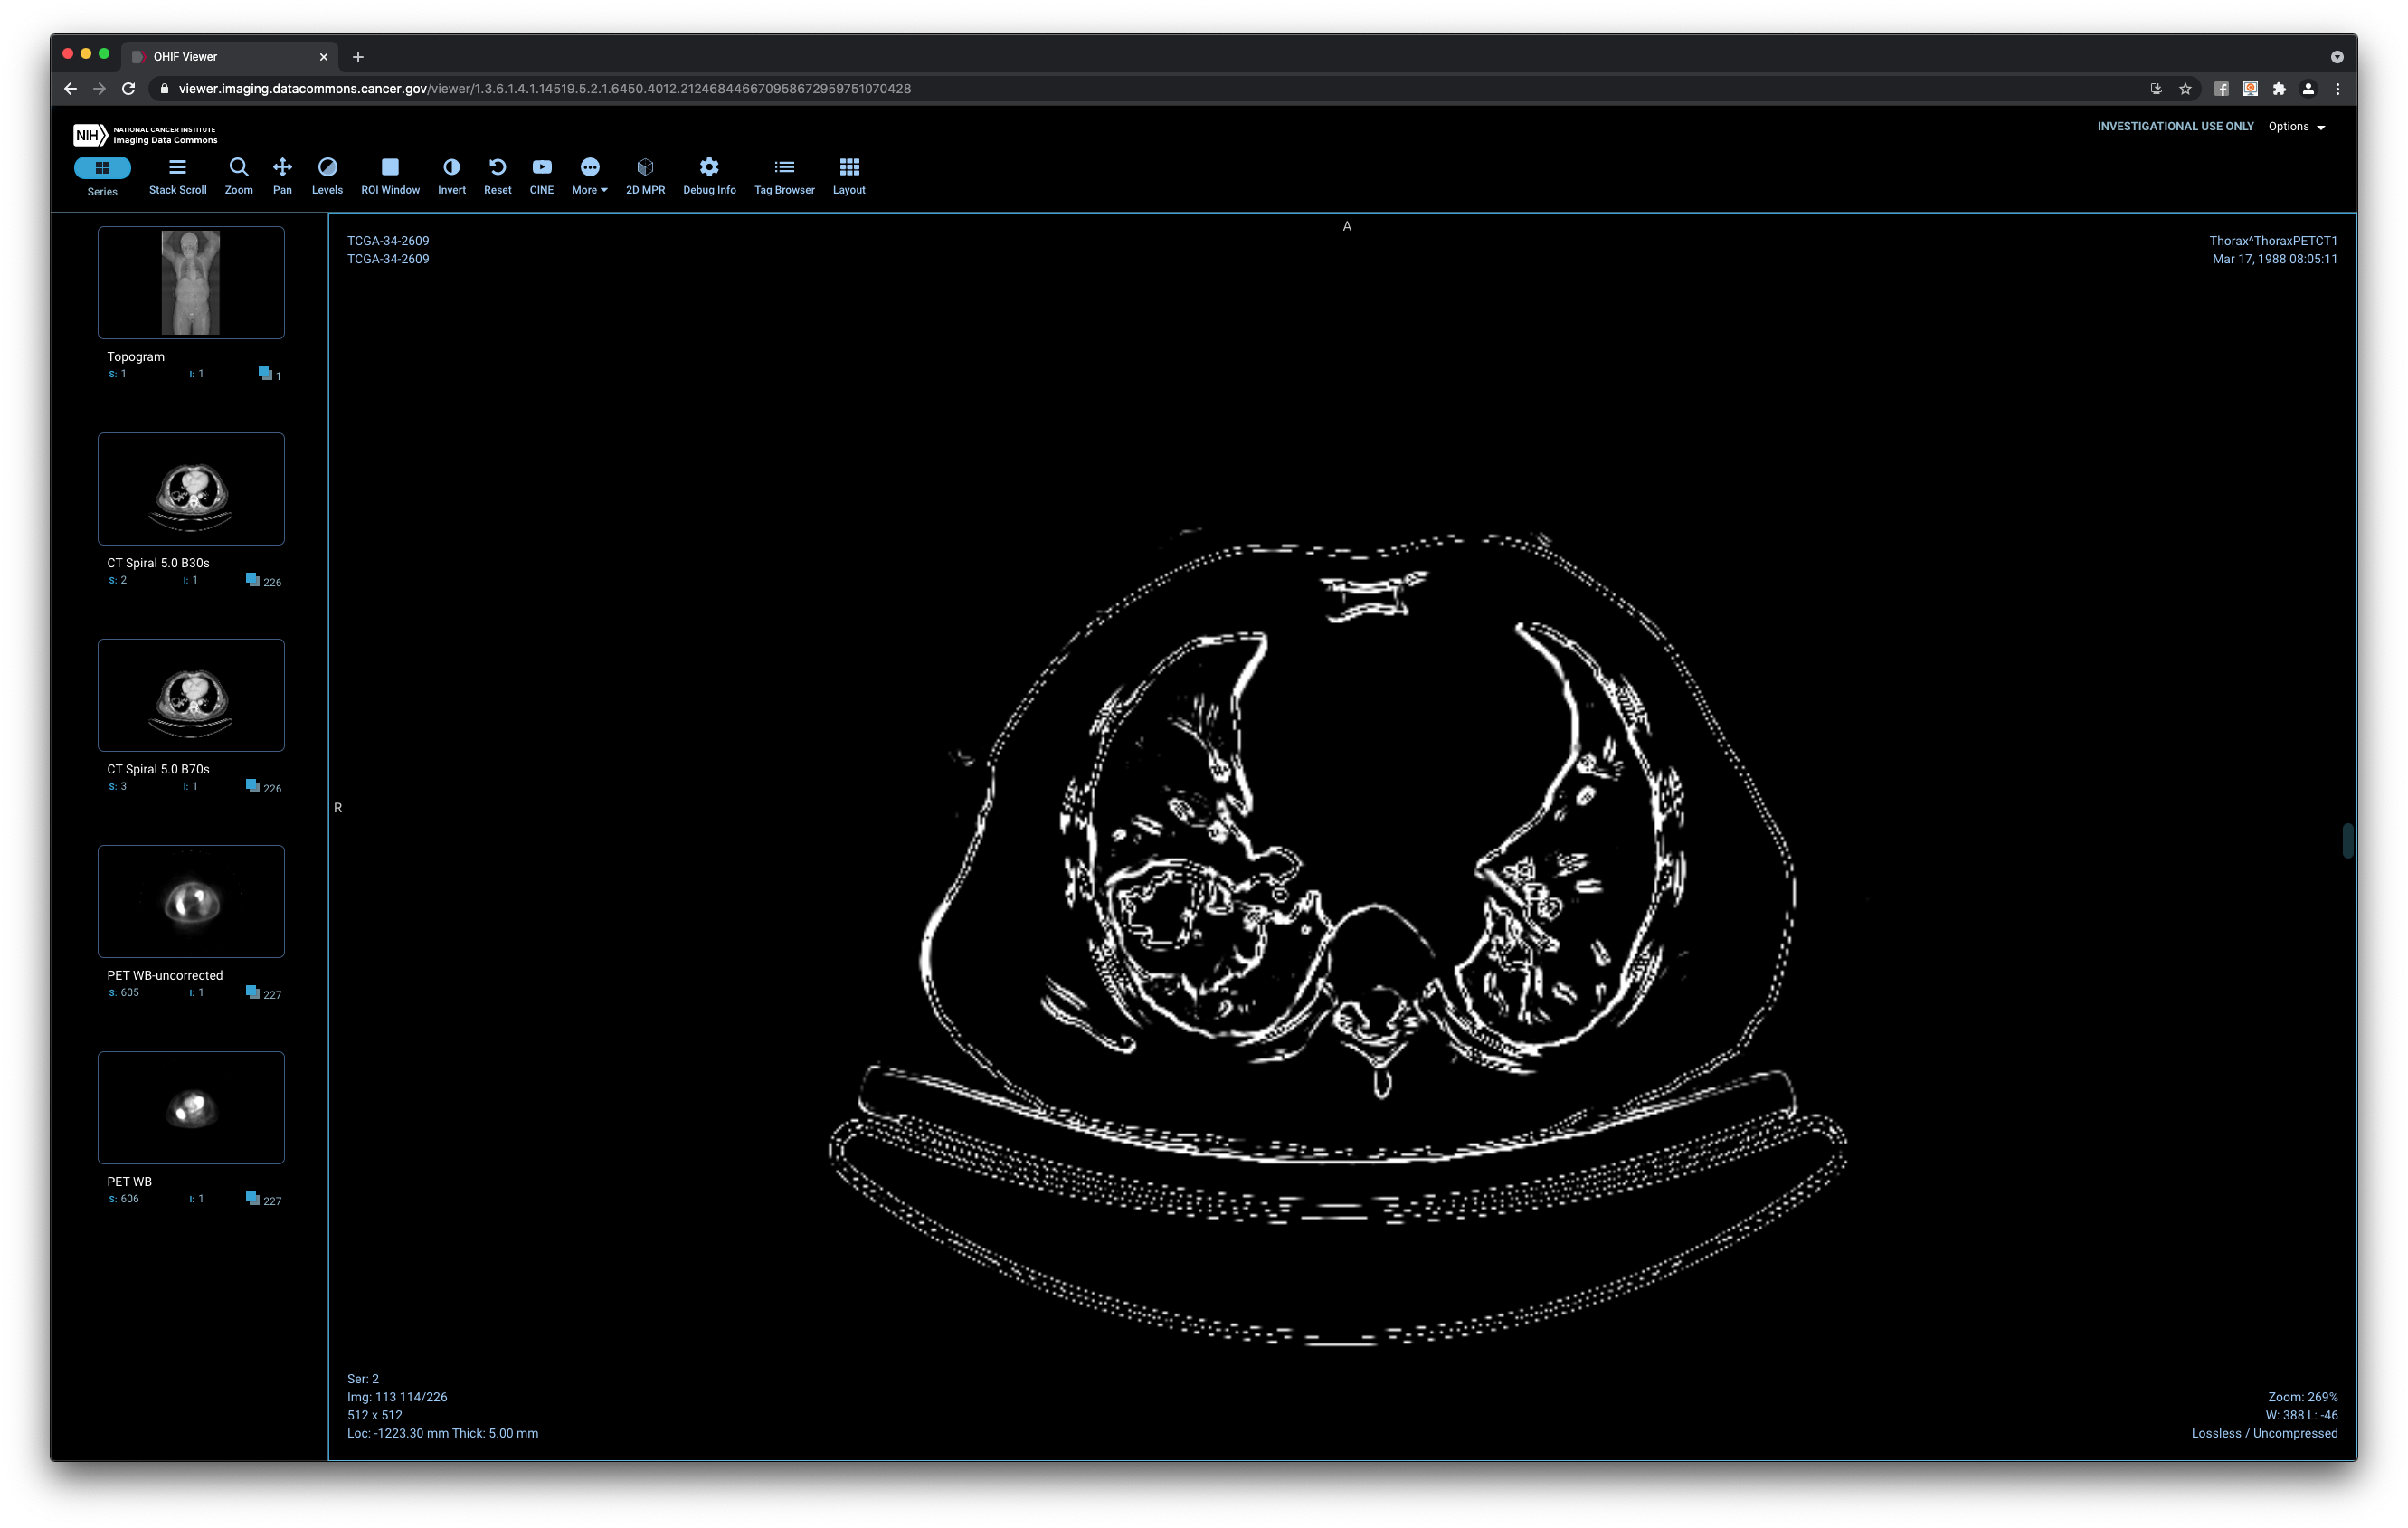

In [ ]:
#
# SUPER BONUS (+33 extra): Can you trigger the redraw programmatically?
#

In [ ]:
# TODO: YOUR CODE FOR REDRAW GOES HERE

Just add one line of code to do the redraw: 
***cornerstone.renderGrayscaleImage(element, true)***

This line of code can be found in the above code. It is at the end of function ***applyFilter()***

In [ ]:
#
# THANK YOU!!!
#
#       .--..--..--..--..--..--.
#     .' \  (`._   (_)     _   \
#   .'    |  '._)         (_)  |
#   \ _.')\      .----..---.   /
#   |(_.'  |    /    .-\-.  \  |
#   \     0|    |   ( O| O) | o|
#    |  _  |  .--.____.'._.-.  |
#    \ (_) | o         -` .-`  |
#     |    \   |`-._ _ _ _ _\ /
#     \    |   |  `. |_||_|   |
#     | o  |    \_      \     |     -.   .-.
#     |.-.  \     `--..-'   O |     `.`-' .'
#   _.'  .' |     `-.-'      /-.__   ' .-'
# .' `-.` '.|='=.='=.='=.='=|._/_ `-'.'
# `-._  `.  |________/\_____|    `-.'
#    .'   ).| '=' '='\/ '=' |
#    `._.`  '---------------'
#            //___\   //___\
#              ||       ||
#     LGB      ||_.-.   ||_.-.
#             (_.--__) (_.--__)
#
#